# Home task : KNN classification
1. `iris` dataset
    - load `iris` dataset
    - split to train and test
    - train KNN classifiers for different `K`
    - choose the best `K` determined on test set

2. synthetic dataset
    - generrate synthetic dataset
    - split to train and test
    - train KNN regressors for different `K`
    - choose the best `K` determined on test set
    - visualize the decision boundary 




## `Iris` dataset 

In [2]:
import pandas as pd 
import numpy as np 
np.random.seed = 2021
from sklearn.datasets import load_iris
iris = load_iris()
print ('data contains:',iris.keys())
X, y, labels, feature_names  = iris.data, iris.target, iris.target_names, iris['feature_names']
df_iris= pd.DataFrame(X, columns= feature_names) 
df_iris['label'] =  y
features_dict = {k:v for k,v in  enumerate(labels)}
df_iris['label_names'] = df_iris.label.apply(lambda x: features_dict[x])
df_iris

data contains: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(iris["data"], iris["target"], random_state = 0) 

In [4]:
scale = StandardScaler().fit(X_train)
X_train_scaled = scale.transform(X_train)
X_test_scaled = scale.transform(X_test)

In [5]:
n_neighbors = 3
clf = KNeighborsClassifier(n_neighbors)
clf.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [6]:
print ('score train = {:.3f}'.format(clf.score(X_train_scaled,y_train)))
print ('score test = {:.3f}'.format(clf.score(X_test_scaled,y_test)))

score train = 0.973
score test = 0.974


## Synthetic dataset  

<IPython.core.display.Javascript object>


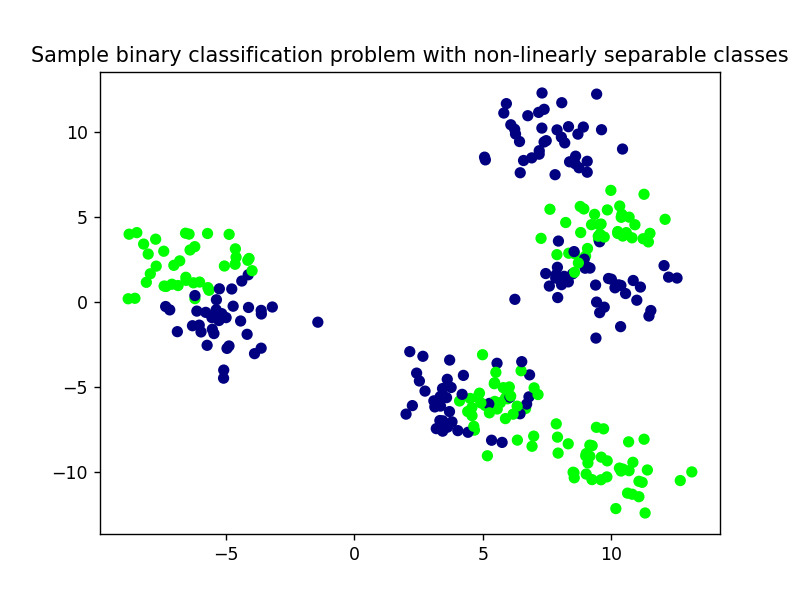

In [7]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib notebook
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['navy', 'gold', 'gray', 'lime'])
np.random.seed= 2021
X_D2, y_D2 = make_blobs(n_samples = 300, n_features = 2, centers = 8, cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2, marker= 'o', s=30, cmap=cmap_bold)

In [22]:
def find_best_k(X, y):
    scores_train = []
    scores_test = []
    best_score = 0
    best_k = 0
    
    for k in range(1, 11):
        knn = KNeighborsClassifier(n_neighbors=k)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        knn.fit(X_train, y_train)
        score_train = knn.score(X_train, y_train)
        score_test = knn.score(X_test, y_test)
        scores_train.append(score_train)
        scores_test.append(score_test)
        
        if score_test > best_score:
            best_score = score_test
            best_k = k
        
        print(f"k = {k}, Train Score = {score_train}, Test Score = {score_test}")
    
    print(f"The best k: {best_k}, Best score equals: {best_score}")
    
    return scores_train, scores_test


In [23]:
scores_train, scores_test  = find_best_k(X_D2, y_D2)


k = 1, Train Score = 1.0, Test Score = 0.8833333333333333
k = 2, Train Score = 0.9291666666666667, Test Score = 0.9
k = 3, Train Score = 0.9458333333333333, Test Score = 0.8666666666666667
k = 4, Train Score = 0.9291666666666667, Test Score = 0.9
k = 5, Train Score = 0.925, Test Score = 0.8833333333333333
k = 6, Train Score = 0.9166666666666666, Test Score = 0.9
k = 7, Train Score = 0.925, Test Score = 0.8666666666666667
k = 8, Train Score = 0.9291666666666667, Test Score = 0.8833333333333333
k = 9, Train Score = 0.9291666666666667, Test Score = 0.8833333333333333
k = 10, Train Score = 0.9291666666666667, Test Score = 0.8833333333333333
The best k: 2, Best score equals: 0.9


<IPython.core.display.Javascript object>


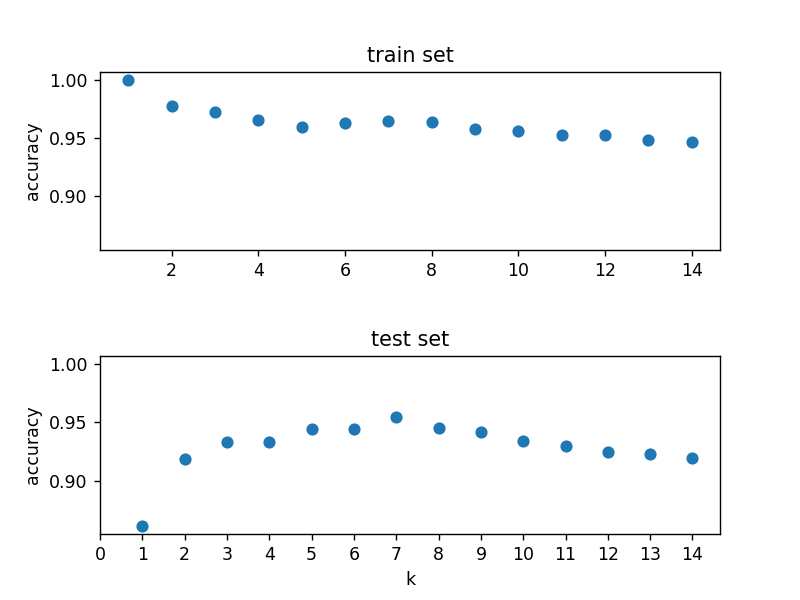

Text(0.5, 1.0, 'test set')

In [25]:
fig, ((ax1,ax2)) = plt.subplots(nrows=2, ncols=1, sharey=True)
k_range = range(1,15)
scores_train = []
scores_test=[]

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    scores_train.append(knn.score(X_train_scaled, y_train))
    scores_test.append(knn.score(X_test_scaled, y_test))


plt.sca(ax1)
plt.ylabel('accuracy')

ax1.scatter(k_range, scores_train)


plt.sca(ax2)
plt.xlabel('k')

plt.ylabel('accuracy')
ax2.scatter(k_range, scores_test)
plt.xticks(range(15))
fig.subplots_adjust(hspace=.6)
ax1.set_title('train set')
ax2.set_title('test set')